In [1]:
import pandas as pd
#import numpy as np
#import seaborn as sns
import time
import _system as OCS
#import _general as GenFun
#import _compare as Diff

In [2]:
st = time.time()

In [3]:
## CONDUCTOR PARTICULARS AND LOADING CONDITIONS
Conductors = pd.DataFrame({
    'Type': ['Messenger Wire', 'Contact Wire', 'Hangers'],
    'Weight': [1.544, 1.063, 0.2],
    'Tension': [5000, 3300, 0]
     })

In [4]:
PreSagNone = OCS.CatenaryFlexibleCSV(Conductors, 'InputData_none.csv')
PreSagNeg = OCS.CatenaryFlexibleCSV(Conductors, 'InputData_neg.csv')
PreSagPos = OCS.CatenaryFlexibleCSV(Conductors, 'InputData_pos.csv')

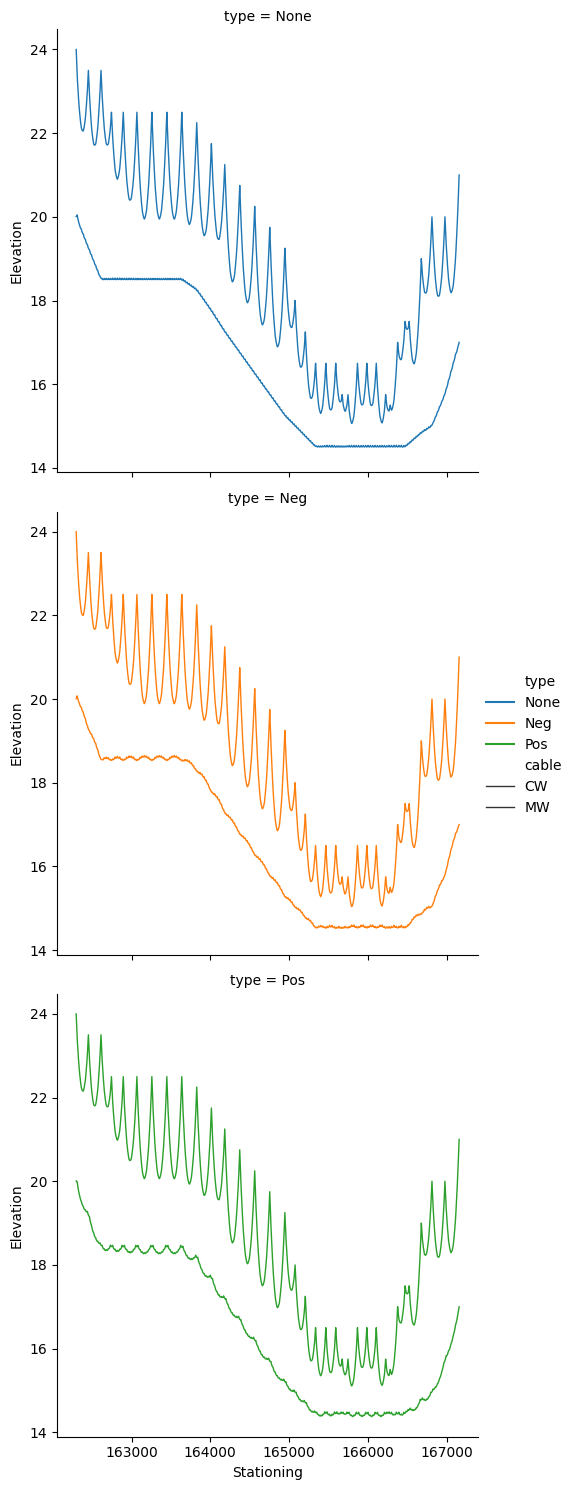

In [5]:
#=========PLOT==============
#print(PreSagNone.plot())
#print(PreSagNeg.plot())
#print(PreSagPos.plot())
pl = OCS.combine_plots(
    ('None', 'Neg', 'Pos'),
    (PreSagNone.dataframe(), PreSagNeg.dataframe(), PreSagPos.dataframe()),
    row='type'
)
#=========SAVE==============
#PreSagNone.savetocsv('OutputData_PreSagNone.csv')
#PreSagNeg.savetocsv('OutputData_PreSagNeg.csv')
#PreSagPos.savetocsv('OutputData_PreSagPos.csv')

In [6]:
start = 3
end = 7

SlicedWireRun_None = OCS.import_wr('InputData_none.csv', start, end)
PreSagNone_sliced = OCS.CatenaryFlexible(Conductors, SlicedWireRun_None)

SlicedWireRun_Neg = OCS.import_wr('InputData_neg.csv', start, end)
PreSagNeg_sliced = OCS.CatenaryFlexible(Conductors, SlicedWireRun_Neg)

SlicedWireRun_Pos = OCS.import_wr('InputData_pos.csv', start, end)
PreSagPos_sliced = OCS.CatenaryFlexible(Conductors, SlicedWireRun_Pos)

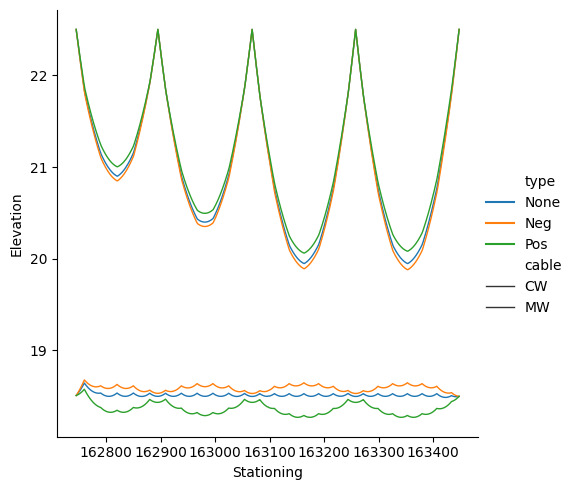

In [7]:
pl = OCS.combine_plots(
    ('None', 'Neg', 'Pos'),
    (PreSagNone_sliced.dataframe(), PreSagNeg_sliced.dataframe(), PreSagPos_sliced.dataframe())
)

In [8]:
#Utilizing No PreSag, and same slicing as above
AltC1 = pd.DataFrame({
    'Type': ['Messenger Wire', 'Contact Wire', 'Hangers'],
    'Weight': [1.544, 1.063, 0.2],
    'Tension': [5000, 3300, 0]
     })
Uplift = OCS.AltCondition(PreSagNone_sliced, AltC1)
Uplift.resetloadlist((-25,163050))
eldiff = Uplift.getcwdiff()
print('min', min(eldiff))
print('max', max(eldiff))

min 0.0
max 0.0711208297646806


In [9]:
AltC1

,Type,Weight,Tension
0,Messenger Wire,1.544,5000
1,Contact Wire,1.063,3300
2,Hangers,0.200,0


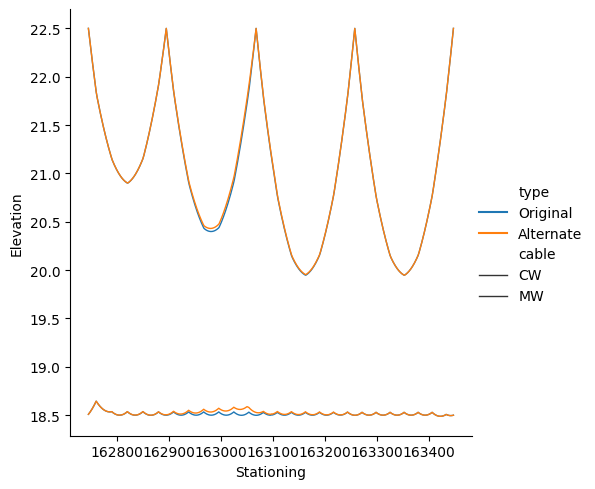

In [10]:
Uplift.compareplot()

In [11]:
#==========================
# ELASTICITY CHECK
# SLICED DESIGN DATA
#==========================

In [12]:
Elasticity = OCS.Elasticity(PreSagNone_sliced, AltC1, 25, 1, 1, 2)

Checking elasticity from STA 162895.0 to STA 163068.0
 |  173 total cycles estimating to take 68.9059 seconds
173  total loops processed in 72.77506804466248 with average               cycle time of 0.42066513320614146


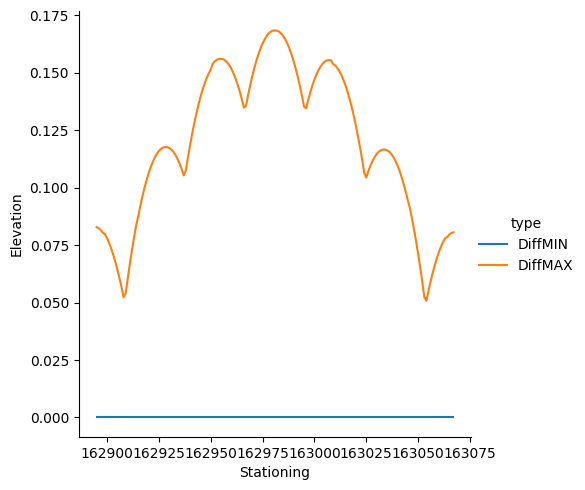

In [13]:
Elasticity.plot()

In [14]:
et = time.time()
elapsed_time = et - st
print('total elapsed time =', elapsed_time)

total elapsed time = 84.11197566986084
